<a href="https://colab.research.google.com/github/JMML2021/Sprint-7.-Algoritmes-d-aprenentatge-supervisat-Classificaci-/blob/main/Sprint_7.4_Algoritmes_d%E2%80%99aprenentatge_supervisat_Classificacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sprint 7.** 

Algoritmes d’aprenentatge supervisat: Classificació


Per continuar progressant gradualment durant el teu procés formatiu de l'especialització, és important que prenguis molta atenció en els següents capítols d'aquest sprint: models d'aprenentatge supervisat - classificació (amb exemples).

In [34]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [35]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Abro el fichero
 
path = ('/content/drive/MyDrive/01_COLAB/wineData.txt')

    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]

Hay  177 filas con 14 columnas

Imprimo el primer registro, solo para ver como es:



1           1.00
14.23      13.20
1.71        1.78
2.43        2.14
15.6       11.20
127       100.00
2.8         2.65
3.06        2.76
.28         0.26
2.29        1.28
5.64        4.38
1.04        1.05
3.92        3.40
1065     1050.00
Name: 0, dtype: float64

In [38]:

from sklearn.datasets import load_wine
wine=load_wine()

data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

# Revisamos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [39]:
# Asigno un nomber a las columnas:

Nombre_Columnas  = ['target','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

In [40]:
# Asigno una lista con los nombres de las columnas
df1.columns = Nombre_Columnas
df1.iloc[0]

target                             1.00
alcohol                           13.20
malic_acid                         1.78
ash                                2.14
alcalinity_of_ash                 11.20
magnesium                        100.00
total_phenols                      2.65
flavanoids                         2.76
nonflavanoid_phenols               0.26
proanthocyanins                    1.28
color_intensity                    4.38
hue                                1.05
od280/od315_of_diluted_wines       3.40
proline                         1050.00
Name: 0, dtype: float64

In [41]:
# Busco si hay datos faltantes

(df1.isnull() | df1.empty | df1.isna()).sum()

target                          0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [42]:
df1.head()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# Data analysis
Basic statistical analysis

##Basic statistical analysis

In [43]:
# Vamos a mostrar un resumen del conjunto de datos donde podemos ver
# los datos estadísticos básicos.
df1.describe()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [44]:
#Veamos la frecuencia del objetivo variable.
##Convertir variable a categórica.
data.target=data.target.astype('int64').astype('category')

#Frequencia.
frecuencia=df1['target'].value_counts()

frecuencia

2    71
1    58
3    48
Name: target, dtype: int64

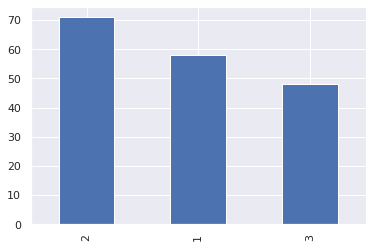

In [45]:
#Graficamos la frecuencia
frecuencia.plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52b77ebd10>,
      dtype=object)

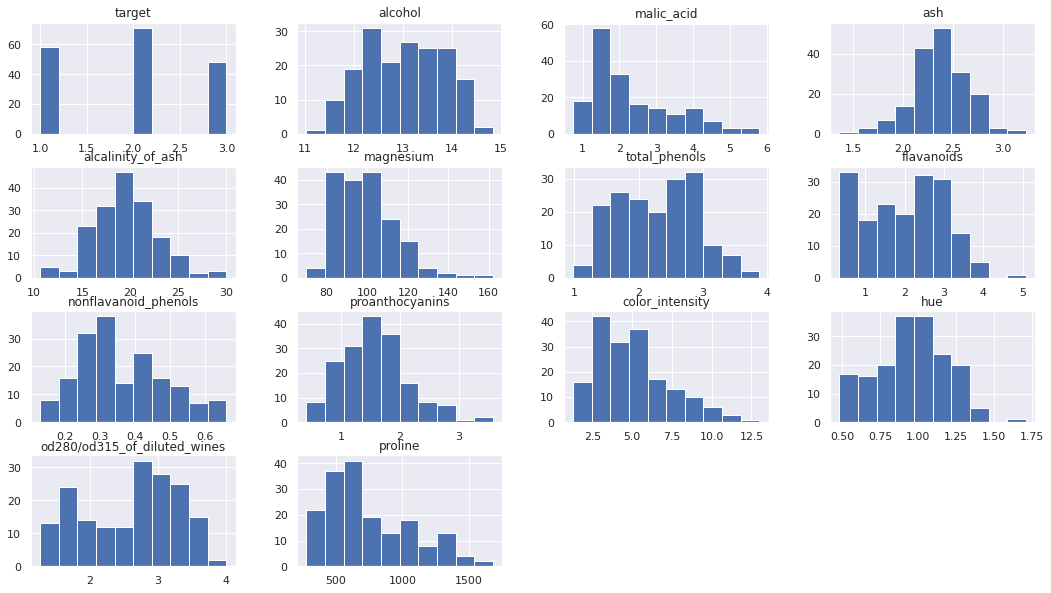

In [46]:
#Vamos a mostrar los histogramas de las variables alcohol, magnesio y color_intensity.....
#Histogramas

df1[df1.columns].hist(figsize=(18,10))

https://www.alldatascience.com/classification/wine-dataset-analysis-with-python/

En los puntos anteriores vemos como todas las variables del conjunto de datos, excepto la variable **target**, son numéricas continuas. 

No faltan valores en ninguna de las variables. De los valores estadísticos básicos podemos ver que ninguna de las variables sigue una distribución normal, ya que ninguna tiene media 0 y desviación estándar 1. 

En los histogramas podemos observar como la variable alcohol tiene una distribución más o menos centrada, con la mayoría de las registros que tienen valores entre 12 y 14 grados, en cuanto a color_intensity y malic_acid, observamos que sus distribuciones están sesgadas a la izquierda.

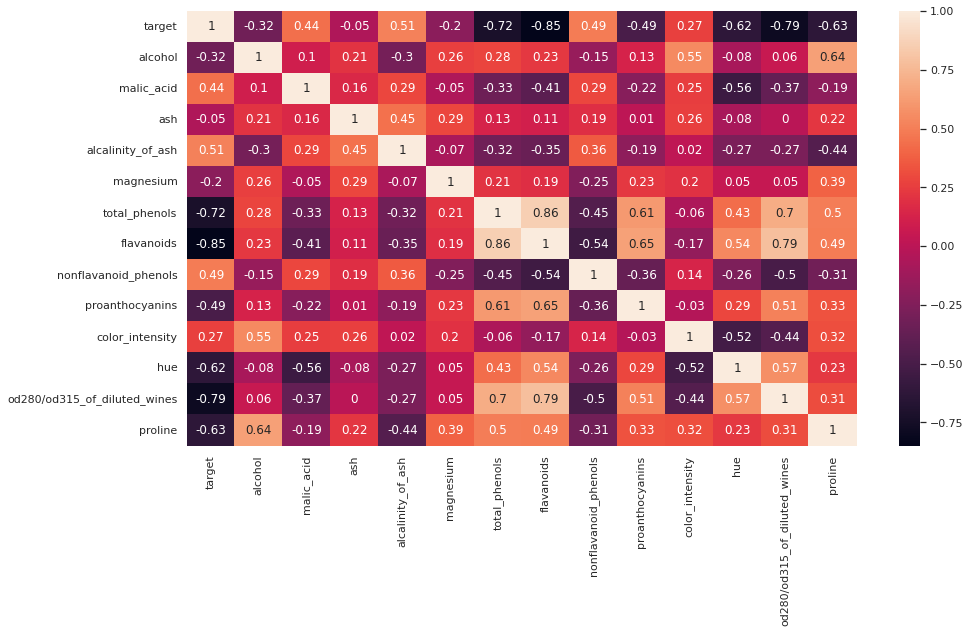

In [47]:
# Creo la matriz de correlacion entre todos los factores.

correlation_matrix = df1.corr().round(2) 
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=correlation_matrix, annot=True)

# PCA

In [48]:
#Import sl transformacion StandScaler
from sklearn.preprocessing import StandardScaler

#Separamosla columna "target".
x = df1.loc[:,data.columns != 'target'].values
y = df1.loc[:,['target']].values

#Transformamos los datos
x= pd.DataFrame(StandardScaler().fit_transform(x))
y=pd.DataFrame(y)
# creamos el PCA:
pca = PCA(n_components=2)

#Obtenemos el PCA.
pComp=pca.fit_transform(x)

principalDf = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2'])

principalDf.head()

,PC 1,PC 2
0,-2.379345,-0.486518
1,-2.469807,1.152548
2,-3.254438,2.726935
3,-1.414881,1.348923
4,-2.657918,1.864433


In [49]:
# Unir de nuevo la variable objetivo

finalDf = pd.concat([principalDf, data[['target']]], axis = 1)
finalDf.head()

,PC 1,PC 2,target
0,-2.379345,-0.486518,0
1,-2.469807,1.152548,0
2,-3.254438,2.726935,0
3,-1.414881,1.348923,0
4,-2.657918,1.864433,0


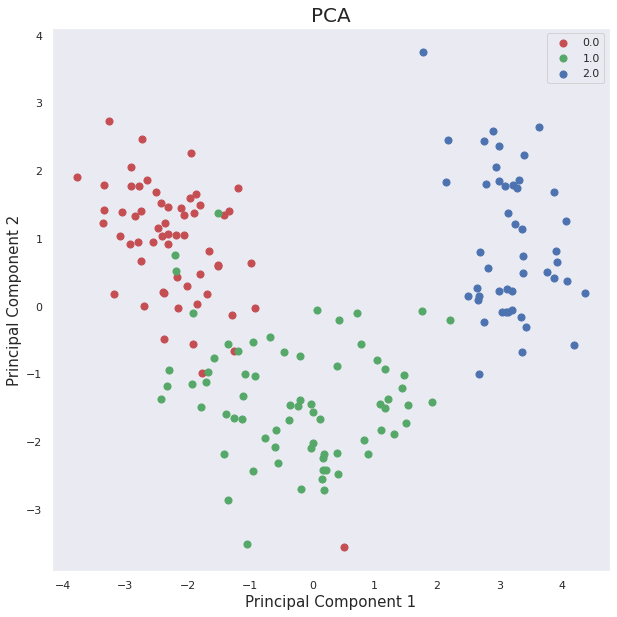

In [50]:
# Mostramos los graficos
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Normalizo los datos

In [51]:
# Normalizo los datos para evitar que las columnas de valores grandes 
# se impongan a las columnas de valores pequeños:


from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(df1.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df1.copy(), 4)
df3= pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

df3

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1.368871,0.888171,2.965658,0.305655,0.295509,-0.324579,-0.980097,-1.419361,1.268570,-0.924589,1.141219,-1.387314,-1.229247,-0.016230
173,1.368871,0.503803,1.406725,0.415023,1.047020,0.170684,-0.788003,-1.278776,0.544517,-0.310476,0.968647,-1.124717,-1.485253,0.015618
174,1.368871,0.342617,1.738222,-0.387012,0.145207,1.444215,-1.124168,-1.339027,0.544517,-0.415753,2.219795,-1.606145,-1.485253,0.286324
175,1.368871,0.218628,0.224086,0.014006,0.145207,1.444215,-1.028121,-1.349068,1.349020,-0.222746,1.831507,-1.562379,-1.399918,0.302248


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52b6ea6e50>,
      dtype=object)

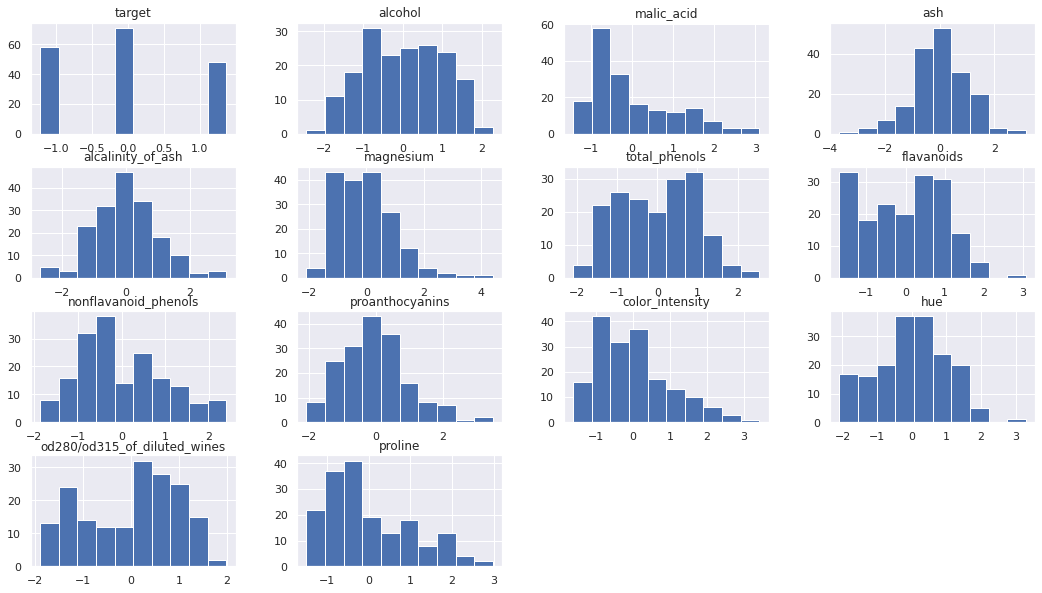

In [52]:
# COn los datos transformados veo si ha cambiado mucho la forma de cada variable
df3[df3.columns].hist(figsize=(18,10))

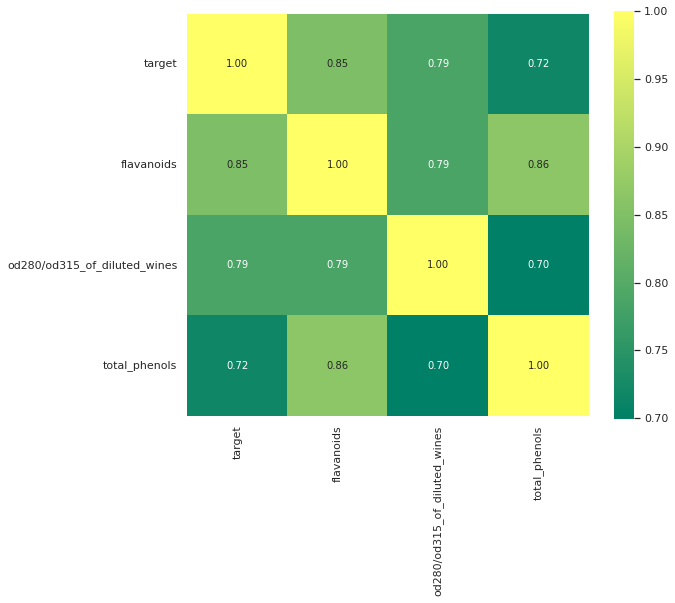

In [53]:
# Quiero ver que variables tienen mas correlacion con respecto al target

columns_sorted = df3.corr().abs().nlargest(4, 'target').index
correlation_sorted = np.corrcoef(df3[columns_sorted].values.T)

f, ax = plt.subplots(figsize = (9,7.5))
hm = sns.heatmap(abs(correlation_sorted), annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns_sorted.values, xticklabels=columns_sorted.values, cmap='summer')
plt.show()

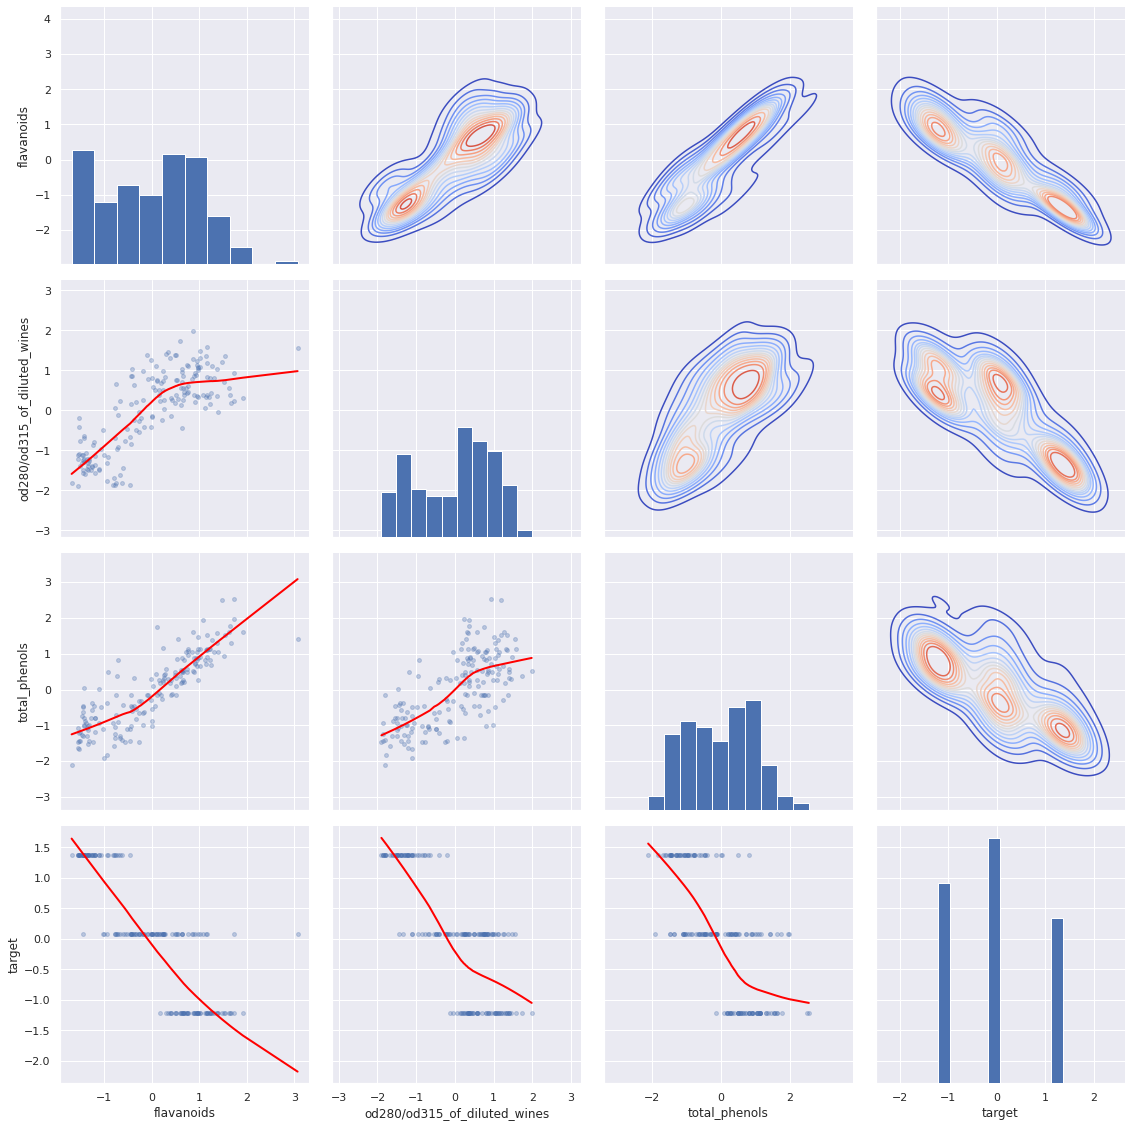

In [54]:
# Dibujar relaciones entre los datos de una manera visual de las 3 variables 
# con mas correlacion con la salida:

sns.set(rc={'figure.figsize':(15, 10)})

ColumnasCorrelacionAlta  = [ 'flavanoids','od280/od315_of_diluted_wines', 'total_phenols', 'target',] 
                             
g = sns.PairGrid(df3, vars=ColumnasCorrelacionAlta, height=4, aspect=1)
g = g.map_diag(plt.hist)
g = g.map_lower(sns.regplot, lowess=True, scatter_kws={'s': 15, 'alpha':0.3}, 
                line_kws={'color':'red', 'linewidth': 2})
g = g.map_upper(sns.kdeplot, n_levels=15, cmap='coolwarm')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
plt.show()

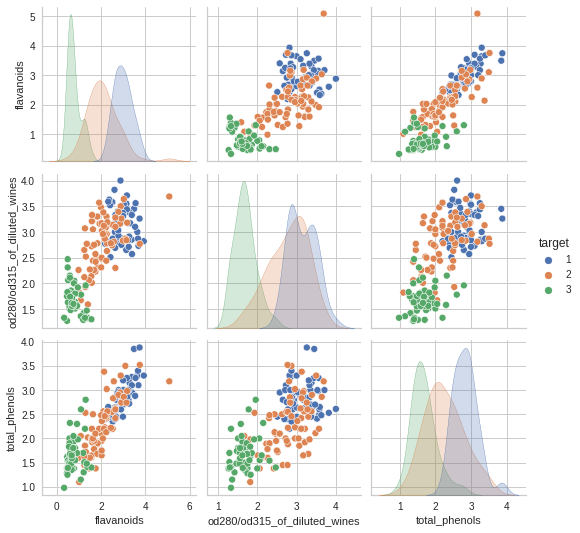

In [125]:
#scatter plots 

df2 = df1[['flavanoids','od280/od315_of_diluted_wines', 'total_phenols', 'target']]
sns.pairplot(df2,hue='target', palette='deep')

Hasta aquí el estudio de los datos


---



# - Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [56]:
# Guardaré las metricas para el ejercicio 2

metricasEjercicio2 = []

In [57]:
# Importo train_test_split function para dividir los datos en Test y Train
from sklearn.model_selection import train_test_split


# Creo la columna X e Y:
datos_x = df1.loc[:,data.columns != 'target'].values
datos_y = df1.loc[:,['target']].values

#Dividimos el dataset en training set y test set
X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, test_size=0.3,random_state=109) # 70% training and 30% test

In [58]:
# Creo Subrutina de metricas:

#Importo scikit-learn metrics module para el calculo
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

######################################################################
 
def MetricasModelo(metodo, Y_real, Y_calculado, scores):
  print('Metodo: ', metodo)
  
  #Precisión del modelo: ¿con qué frecuencia es correcto el clasificador?
  #accuracy = metrics.accuracy_score(Y_real, Y_calculado)
  #print("Accuracy:", accuracy)

  rmse = np.sqrt(mean_squared_error(Y_real, Y_calculado,))
  print("RMSE: %f" % (rmse))
  

  R_squared = r2_score(Y_real, Y_calculado,)

  print("R-Squared: ", np.round(R_squared, 2))
 
  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  accuracy = "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

  # Guardo metricas
  metricasEjercicio2.append([metodo, rmse, R_squared, accuracy])

  


## 1.- SVM Support Vector Machines con Scikit-learn

https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

In [130]:
#Import svm model
from sklearn import svm

#Creamos us svm Clasificador
clf_SVM = svm.SVC(kernel='linear') # Linear Kernel

#Entrenamos el modelo usando training sets
clf_SVM.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_SVM = clf_SVM.predict(X_test)

In [60]:
# Ver como  lo hace lineal
print(y_pred_SVM)

[1 1 2 3 1 2 1 2 2 1 2 2 3 2 1 3 2 1 1 2 3 2 1 2 2 1 2 3 1 3 3 2 3 1 2 2 1
 3 3 1 3 1 1 1 1 3 2 1 2 3 3 2 1 3]


In [131]:
#clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores_SVM = cross_val_score(clf_SVM, X_train, y_train, cv=5)
 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_SVM.mean(), scores_SVM.std() * 2))

Accuracy: 0.98 (+/- 0.04)


In [62]:
MetricasModelo( 'SVM', y_test, y_pred_SVM, scores_SVM)

Metodo:  SVM
RMSE: 0.000000
R-Squared:  1.0
Accuracy: 0.98 (+/- 0.04)


In [132]:
# import las métricas

from sklearn import metrics
cnf_matrix_SVM = metrics.confusion_matrix(y_test, y_pred_SVM)
cnf_matrix_SVM

array([[20,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 15]])

Text(1.5, 257.44, 'Predicción')

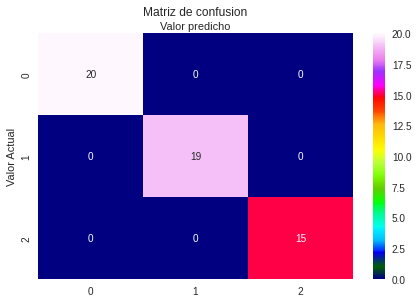

In [133]:
# Creamos la Matriz de Confusion:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_SVM), annot=True, cmap="gist_ncar" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusion', y=1.1)
plt.ylabel('Valor Actual')
plt.xlabel('Valor predicho')
plt.Text(1.5,257.44,'Predicción')

In [65]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
  
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [33]:
fper, tper, thresholds = roc_curve(y_test, y_pred_SVM)
plot_roc_curve(fper, tper)

ValueError: ignored

In [68]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf_SVM, X_test, y_test)
plt.show()

ValueError: ignored

In [69]:
print(X_test)

[[1.000000e+00 1.387000e+01 1.900000e+00 2.800000e+00 1.940000e+01
  1.070000e+02 2.950000e+00 2.970000e+00 3.700000e-01 1.760000e+00
  4.500000e+00 1.250000e+00 3.400000e+00]
 [1.000000e+00 1.371000e+01 1.860000e+00 2.360000e+00 1.660000e+01
  1.010000e+02 2.610000e+00 2.880000e+00 2.700000e-01 1.690000e+00
  3.800000e+00 1.110000e+00 4.000000e+00]
 [2.000000e+00 1.229000e+01 1.610000e+00 2.210000e+00 2.040000e+01
  1.030000e+02 1.100000e+00 1.020000e+00 3.700000e-01 1.460000e+00
  3.050000e+00 9.060000e-01 1.820000e+00]
 [3.000000e+00 1.349000e+01 3.590000e+00 2.190000e+00 1.950000e+01
  8.800000e+01 1.620000e+00 4.800000e-01 5.800000e-01 8.800000e-01
  5.700000e+00 8.100000e-01 1.820000e+00]
 [1.000000e+00 1.438000e+01 3.590000e+00 2.280000e+00 1.600000e+01
  1.020000e+02 3.250000e+00 3.170000e+00 2.700000e-01 2.190000e+00
  4.900000e+00 1.040000e+00 3.440000e+00]
 [2.000000e+00 1.237000e+01 1.170000e+00 1.920000e+00 1.960000e+01
  7.800000e+01 2.110000e+00 2.000000e+00 2.700000e-01

In [136]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle


def plot_roc_curve(y_test, y_pred):
  
  n_classes = len(np.unique(y_test))
  y_test = label_binarize(y_test, classes=np.arange(n_classes))
  y_pred = label_binarize(y_pred, classes=np.arange(n_classes))

  # Calculamos la curva de ROC y el área de ROC para cada clase
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
  # Calculo la media la curva de ROC y el área de ROC 
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Priemro añadimos todos los falsos positivos 
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Ahora interpolamos todas las curvas
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Calculamos la medai y calculamos la AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot atodas las curvas de ROC
  plt.figure(figsize=(10,5))
  plt.figure(dpi=200)
  lw = 2
  plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

  plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,)

  colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic (ROC) curve")
  plt.legend()

<Figure size 720x360 with 0 Axes>

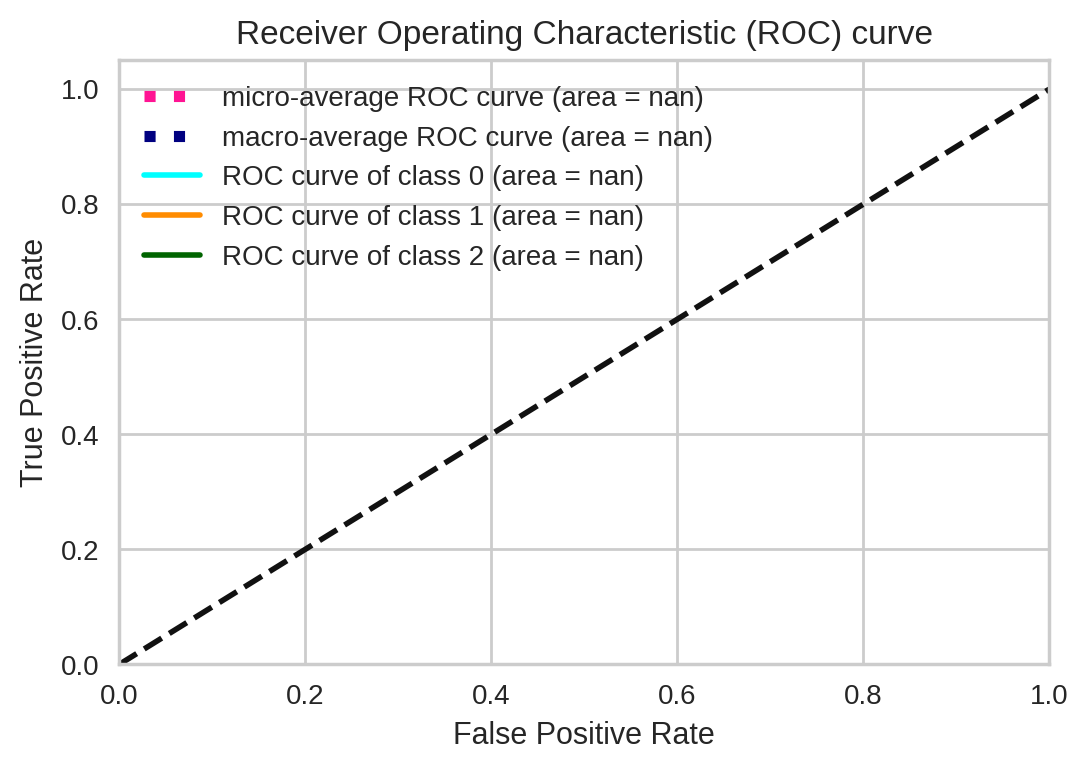

In [137]:
# LLamamos a la curva de ROC:

plot_roc_curve(y_test, y_pred_SVM)

Nota:
La curva sale demasiado perfecto, y eso no es normal 



---



## 2.- XGBoost


https://www.datacamp.com/tutorial/xgboost-in-python

In [75]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# X_train, X_test, y_train, y_test
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [76]:
# Creo el modelo:
'''
xg_reg = xgb.XGBRegressor(objective ="reg:squarederror", colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
'''
xg_reg = xgb.XGBClassifier(objective="multi:softprob",  n_classes=3)

xg_reg.fit(X_train,y_train)

y_preds_XGBoost = xg_reg.predict(X_test)
y_preds_XGBoost 

array([1, 1, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 3, 2, 1, 1, 2, 3, 2,
       1, 2, 2, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1,
       1, 3, 2, 1, 2, 3, 3, 2, 1, 3])

In [77]:
for a in range(30):
  print(y_preds_XGBoost[a], y_test[a])

1 [1]
1 [1]
2 [2]
3 [3]
1 [1]
2 [2]
1 [1]
2 [2]
2 [2]
1 [1]
2 [2]
2 [2]
3 [3]
2 [2]
1 [1]
3 [3]
2 [2]
1 [1]
1 [1]
2 [2]
3 [3]
2 [2]
1 [1]
2 [2]
2 [2]
1 [1]
2 [2]
3 [3]
1 [1]
3 [3]


In [78]:
print(xg_reg)

XGBClassifier(n_classes=3, objective='multi:softprob')


In [79]:
# import las métricas
from sklearn import metrics
cnf_matrix_XGB = confusion_matrix(y_test, y_preds_XGBoost)
cnf_matrix_XGB

array([[20,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 15]])

In [80]:
confusion_matrix = confusion_matrix(y_test, y_preds_XGBoost )
print(confusion_matrix)

[[20  0  0]
 [ 0 19  0]
 [ 0  0 15]]


In [81]:

scores_SGB = cross_val_score(xg_reg, X_train, y_train, cv=5)
MetricasModelo( 'XGBoost', y_test, y_preds_XGBoost, scores_SGB)

Metodo:  XGBoost
RMSE: 0.000000
R-Squared:  1.0
Accuracy: 1.00 (+/- 0.00)


In [138]:
# Hacer el grafico de Error

#from yellowbrick.regressor import clf
from yellowbrick.regressor import prediction_error
from sklearn.metrics import mean_squared_error as mse

MSE = mse(y_preds_XGBoost , y_test)
#MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)

print("\nRMSE: ", np.round(RMSE, 2))
print()
#print("R-Squared: ", np.round(R_squared, 2))

print("\nPrediction Error Plot")
#X_train, X_test, y_train, y_test
print(prediction_error(xg_reg, X_train, y_train, X_test, y_test))

# Making the Residuals Plot
print("\nResiduals Plot")

#NO SON de la misma LONGITUD ERROR
#print(residuals_plot(xg_reg, X_train, y_train, X_test, y_test))


RMSE:  0.0


Prediction Error Plot


YellowbrickTypeError: ignored

https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

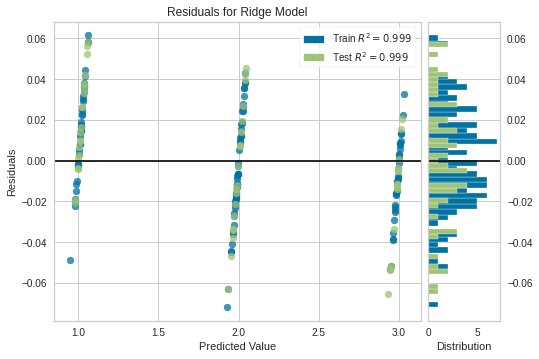

In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


# Creo la columna X e Y:
datos_x = df1.loc[:,data.columns != 'target'].values
datos_y = df1.loc[:,['target']].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, test_size=0.3,random_state=109) # 70% training y 30% test


'''

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# Visualizar el modelo lineal
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

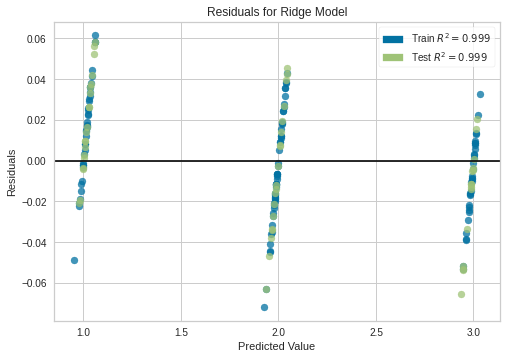

In [84]:
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

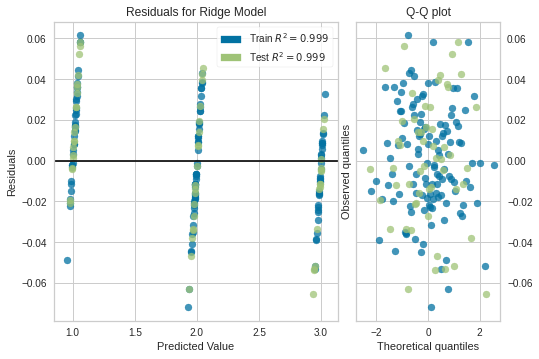

In [85]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [86]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

num_boost_round=(50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

SyntaxError: ignored

In [87]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

NameError: ignored

In [88]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [89]:
# Buscar los mejores Hiperparametros de XGBoost:

from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

#regressor = XGBRegressor(tree_method='gpu_hist', random_state=0, objective='reg:squarederror')
#regressor.fit(X_train, y_train)
#xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, 
                            param_distributions=params, 
                            random_state=42, 
                            n_iter=200, 
                            cv=3, 
                            verbose=1, 
                            n_jobs=1, 
                            return_train_score=True)

search.fit(X_train,y_train)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'colsample_bytree': 0.9248848696025762, 'gamma': 0.01523607636679708, 'learning_rate': 0.290164494322417, 'max_depth': 3, 'n_estimators': 134, 'subsample': 0.758865533001633}



## 3.- Regresion Logistica

Regresión logística ordinal: la variable objetivo tiene tres o más categorías ordinales, como restaurante o calificación de producto de 1 a 5.

In [90]:
# importar la libreria de regresion logistica the class
from sklearn.linear_model import LogisticRegression

# instanciar el modelo (usando los parámetros predeterminados)
logreg = LogisticRegression()

# fit el modelo
logreg.fit(X_train,y_train)

#
y_pred_RLogis=logreg.predict(X_test)

In [91]:
#clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores_RL = cross_val_score(logreg, X_train, y_train, cv=5)
 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_RL.mean(), scores_RL.std() * 2))

Accuracy: 0.95 (+/- 0.06)


In [92]:
MetricasModelo( 'Regresion Logistica', y_test, y_pred_RLogis, scores_RL)

Metodo:  Regresion Logistica
RMSE: 0.136083
R-Squared:  0.97
Accuracy: 0.95 (+/- 0.06)


In [93]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
# Subrutina Dibujar matriz de Confusión:

def dibujarMatrizConfusion(matrizConfusion ):
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  # Creamos el mapa de calor:
  sns.heatmap(pd.DataFrame(matrizConfusion ), 
              annot=True, cmap="gist_ncar" ,fmt='g')

  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Matriz de confusion', y=1.1)
  plt.ylabel('Valor Actual')
  plt.xlabel('Valor predicho')
  plt.Text(1.5,257.44,'Predicción')

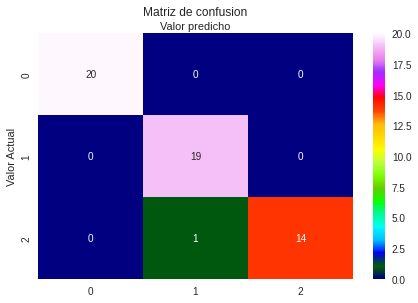

In [95]:
# import las métricas
#from sklearn import metrics
matrizConfusion = metrics.confusion_matrix(y_test, y_pred_RLogis)
#modelo
dibujarMatrizConfusion(matrizConfusion )

One-vs-the-rest (OvR) multiclass strategy.


In [96]:

# Multiclass case


# Creo la columna X e Y:
datos_x = df1.loc[:,data.columns != 'target'].values
datos_y = df1.loc[:,['target']].values

datos_y =datos_y.astype(str)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(datos_x, datos_y, test_size=0.3,random_state=109) # 70% training and 30% test



from sklearn.metrics import roc_curve

clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)

lr_probs = clf.predict_proba(X_test)

ns_auc= roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))

#The ROC curve is created by plotting the true positive rate (TPR) against the 
# false positive rate (FPR) at various threshold settings. The true-positive rate
#  is also known as sensitivity, recall or probability of detection.



lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


'''
lr_probs = model.predict_proba(X_test)


lr_auc = roc_auc_score(y_test, lr_probs)

print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC


#ns_fpr, ns_tpr, _ = roc_curve(y-test, lr_probss)
'''

'''



lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
'''

NameError: ignored

In [97]:
r_aucc = roc_auc_score(y_test, lr_probs, multi_class='ovr')

classes_q = sorted(np.unique(y_test))
classes_q
print(classes_q)
#lr_fpr, lr_tpr, thresholds= roc_curve(y_test[0], lr_probs, pos_label=classes_q)


NameError: ignored

https://www.kaggle.com/code/tawejssh/red-wine-quality-classification-basic-ml/notebook

In [98]:
#For ROC curves we have to binarize lables

from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=classes_q)
y_pred_bin = label_binarize(y_pred_RLogis, classes=classes_q)
#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes_q)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    print(i, fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

NameError: ignored

In [99]:
#ROC para una clase especifica
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

NameError: ignored

In [100]:
#ROC para multiclase
# Primero agregue todas las tasas de falsos positivos

from itertools import cycle

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_q))]))

# interpolamos todas las curvas ROC en estos puntos
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes_q)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Calculamos la media y calculamos el AUC
mean_tpr /= len(classes_q)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Dibujamos todas las curvas ROC
 
plt.figure(figsize=(10,5))
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'magenta'])
for i, color in zip(range(len(classes_q)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of quality {0} (area = {1:0.2f})'
             ''.format(classes_q[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


NameError: ignored

## 4.- Utilizando Multinomial logistic regression

In [101]:
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred_MLR = log_reg.predict(X_test)

In [102]:
scores_RLM = cross_val_score(log_reg, X_train, y_train, cv=5)


In [103]:
MetricasModelo( 'Multinomial logistic regression', y_test, y_pred_MLR, scores_RLM )

Metodo:  Multinomial logistic regression
RMSE: 0.000000
R-Squared:  1.0
Accuracy: 0.96 (+/- 0.05)


Echemos un vistazo a las puntuaciones de la validación cruzada:

[[20  0  0]
 [ 0 19  0]
 [ 0  0 15]]


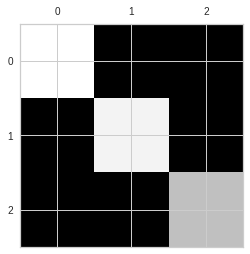

In [104]:
# Dibujamos la matriz de Confusión.



confusion_matrix_MLR = confusion_matrix(y_test, y_pred_MLR)
print(confusion_matrix_MLR)

plt.matshow(confusion_matrix_MLR, cmap=plt.cm.gray)
plt.show()

Text(1.5, 257.44, 'Predicción')

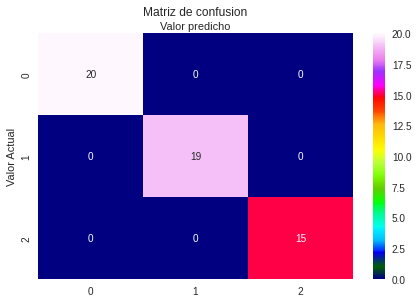

In [105]:
# Matriz de Confusion:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_MLR), annot=True, cmap="gist_ncar" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusion', y=1.1)
plt.ylabel('Valor Actual')
plt.xlabel('Valor predicho')
plt.Text(1.5,257.44,'Predicción')


### Ajuste de la Regresión Multinomial Logistica.

https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

In [109]:

...
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [110]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.993 (0.019)


>0.0000 0.989 (0.022)
>0.0001 0.402 (0.025)
>0.0010 0.846 (0.104)
>0.0100 0.983 (0.033)
>0.1000 0.994 (0.017)
>1.0000 0.993 (0.019)


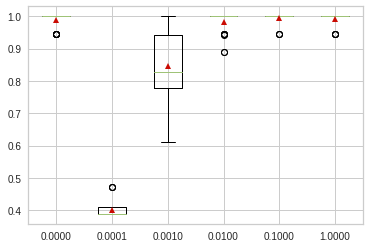

In [111]:
from matplotlib import pyplot
 
# obtenemos una lista de modelos para evaluar
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# creamos el modelo
		key = '%.4f' % p
		#  Desactivamos en los casos que el modelo no funcione
		if p == 0.0:
			# Si no hay penalización con el modelo
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
 
# evaluamos el modelo promedio de la cross-validation

def evaluate_model(model, X, y):
	# definimos el metodo de evaluación
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluamos el modelo
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
 
# obtenemos los modelos a evaluar
models = get_models()
# evaluamos los modelos y guardamos sus valores
results, names = list(), list()
for name, model in models.items():
	# 
	scores = evaluate_model(model, x, y)
	# guardamos los datos
	results.append(scores)
	names.append(name)
	# resumimos la valoracion
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# Dibujamos los modelos 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

**Conclusión:**
Vemos que el modelo que mejor explica se consigue un 0.994

# - Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

                            Metodo      rmse  R_squared  \
0                              SVM  0.000000   1.000000   
1                          XGBoost  0.000000   1.000000   
2              Regresion Logistica  0.136083   0.971046   
3  Multinomial logistic regression  0.000000   1.000000   

                    accuracy  
0  Accuracy: 0.98 (+/- 0.04)  
1  Accuracy: 1.00 (+/- 0.00)  
2  Accuracy: 0.95 (+/- 0.06)  
3  Accuracy: 0.96 (+/- 0.05)  


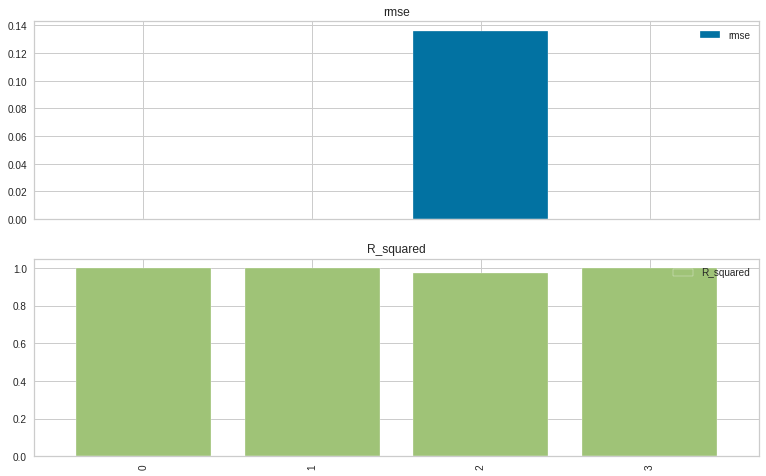

In [112]:
df5=pd.DataFrame(metricasEjercicio2)
# [metodo, rmse, R_squared, accuracy
df5 = df5.rename(columns = {0: 'Metodo', 1: 'rmse', 2: 'R_squared', 3: 'accuracy'})
print(df5)
#plt.axhline(y=.55)
df5.plot(kind='bar',width=0.8,
             subplots=True,
             figsize=(13,8))

plt.show()

In [113]:
# Dibujamos la matriz de Confusión.
from sklearn.metrics import confusion_matrix

def matrizConfusion( modelo, y_real, y_calculada):
    confusion_matrix = confusion_matrix(y_real, y_calculada)
    print(confusion_matrix)

    plt.matshow(confusion_matrix, cmap=plt.cm.gray)
    plt.show()

In [114]:
matrizConfusion( 'XGBoost', y_train, y_preds_XGBoost)

UnboundLocalError: ignored

# - Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

Buen ejercicio

https://www.kaggle.com/code/fkaadou/the-wine-is-mine-with-xgboost/notebook

In [115]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

                    #num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

Buscar mejores parametros de XGBoost


---



In [116]:
xg_reg = xgb.train(params=params, 
                   dtrain=data_dmatrix, 
                   num_boost_round=10)

[10:51:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [117]:
def reporte_mejores_parametros(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
    

In [118]:
# Buscar los mejores Hiperparametros de XGBoost:

from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

 
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, 
                            param_distributions=params, 
                            random_state=42, 
                            n_iter=200, 
                            cv=3, 
                            verbose=1, 
                            n_jobs=1, 
                            return_train_score=True)

search.fit(X_train,y_train)
reporte_mejores_parametros(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'colsample_bytree': 0.9248848696025762, 'gamma': 0.01523607636679708, 'learning_rate': 0.290164494322417, 'max_depth': 3, 'n_estimators': 134, 'subsample': 0.758865533001633}



In [119]:
print(search) 

#xg_reg.fit(X_train,y_train)

y_preds_XGBoost2 = search.predict(X_test)

scores_SGB2 = cross_val_score( search, X_train, y_train, cv=5) 

print('\nAntes: ')
MetricasModelo( 'XGBoost', y_test, y_preds_XGBoost, scores_SGB)
print('\nAhora: ')
MetricasModelo( 'XGBoost_2', y_test, y_preds_XGBoost2, scores_SGB2)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(objective='reg:squarederror',
                                          random_state=42),
                   n_iter=200, n_jobs=1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f52b8864ed0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f52b8efd7d0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f52b8a214d0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f52b8864dd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f52b8ac3f10>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f52b8ac3a50>},
                   random_state=42, retur

**Conclusion**

Hemos con el XGBoost pasado de un $R^{2}$=0.35 a un $R^{2}$=1 ... perfecto!!!

# - Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [120]:
# X_train, X_test, y_train, y_test
#Predict the response for test dataset
y_pred_SVM = clf_SVM.predict(X_test)
MetricasModelo( 'SVM', y_test, y_pred_SVM, scores_SVM)
#datos_x, datos_y

Metodo:  SVM
RMSE: 0.000000
R-Squared:  1.0
Accuracy: 0.98 (+/- 0.04)


In [121]:
# Train
y_pred_SVM_train = clf_SVM.predict(X_train)
MetricasModelo( 'SVM_train', y_train, y_pred_SVM_train, scores_SVM)
print('Tamaño: ',len(y_pred_SVM_train))

Metodo:  SVM_train
RMSE: 0.000000
R-Squared:  1.0
Accuracy: 0.98 (+/- 0.04)
Tamaño:  123


In [122]:
# Train
y_pred_SVM_Test = clf_SVM.predict(X_test)
MetricasModelo( 'SVM_Test', y_test, y_pred_SVM_Test, scores_SVM)
print('Tamaño: ',len(y_pred_SVM_Test))

Metodo:  SVM_Test
RMSE: 0.000000
R-Squared:  1.0
Accuracy: 0.98 (+/- 0.04)
Tamaño:  54


In [123]:
# Train
y_pred_SVM_Y= clf_SVM.predict(datos_x)
MetricasModelo( 'SVM_Todos', datos_y, y_pred_SVM_Y, scores_SVM)
print('Tamaño: ',len(datos_x))

Metodo:  SVM_Todos
RMSE: 0.000000
R-Squared:  1.0
Accuracy: 0.98 (+/- 0.04)
Tamaño:  177


## 4.2 Cross Validation

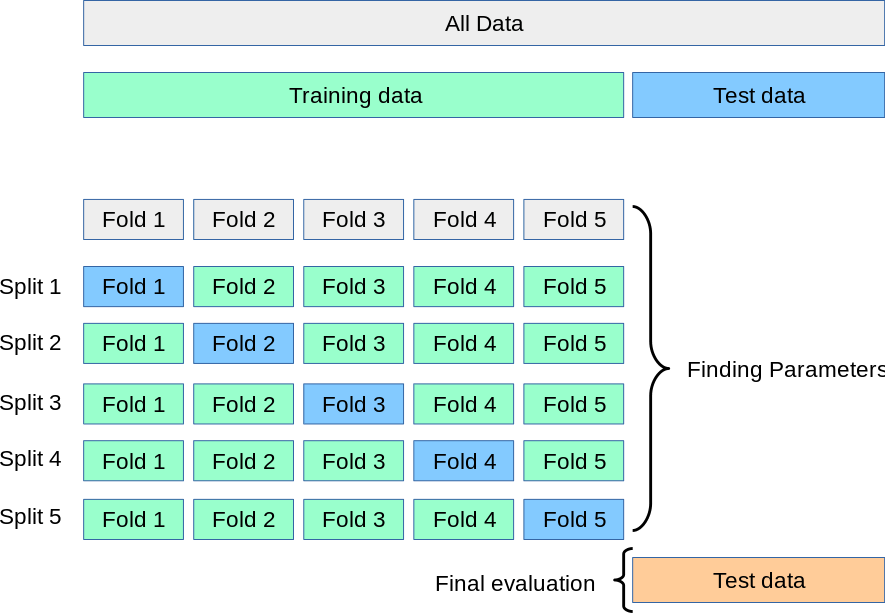

In [124]:
from sklearn.model_selection import cross_validate
scores = cross_validate(clf_SVM, datos_x, datos_y, cv=13,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])

print(scores['train_r2'])

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
